# Plot img Prediction YOLOv5m 
> ## Between Prostate Model and Prostate+Prosmise12 Model

In [1]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import cv2

###  DATA

In [2]:
##** 1. prostate modelYOLOv5m 
prostate = pd.read_csv('/home/kannika/file/Evaluation_ProstateYOLOv5m_testset_scorethr01_DetectPy.csv')
prostate0 = prostate.rename({'pred_xmin': 'pros_xmin', 'pred_ymin': 'pros_ymin', 'pred_xmax': 'pros_xmax', 
                   'pred_ymax': 'pros_ymax'}, axis=1)
print(prostate0.shape)
prostate0.head()

(10, 18)


Unnamed: 0                 fileName  \
0           0  prostate_custom_191.jpg   
1           1  prostate_custom_194.jpg   
2           2  prostate_custom_196.jpg   
3           3  prostate_custom_197.jpg   
4           4  prostate_custom_198.jpg   

                                                Path                gt_xmin  \
0  /media/tohn/SSD_ex/ProstateCancer/test/prostat...  [468.0, 470.0, 351.0]   
1  /media/tohn/SSD_ex/ProstateCancer/test/prostat...         [385.0, 512.0]   
2  /media/tohn/SSD_ex/ProstateCancer/test/prostat...                [572.0]   
3  /media/tohn/SSD_ex/ProstateCancer/test/prostat...                [437.0]   
4  /media/tohn/SSD_ex/ProstateCancer/test/prostat...         [510.0, 527.0]   

                 gt_ymin                gt_xmax                gt_ymax  count  \
0  [309.0, 385.0, 374.0]  [549.0, 551.0, 390.0]  [367.0, 411.0, 432.0]      3   
1         [392.0, 362.0]         [442.0, 544.0]         [452.0, 403.0]      2   
2                [408.0]                [614.0]                [501.0]      1   
3                [382.0]                [518.0]                [430.0]      1   
4         [436.0, 362.0]         [544.0, 553.0]         [475.0, 404.0]      2   

              pros_xmin           pros_ymin           pros_xmax  \
0                    []                  []                  []   
1            [389.0432]          [402.9669]           [443.968]   
2                    []                  []                  []   
3  [500.0365, 382.9705]  [293.976, 382.032]  [519.0105, 426.02]   
4            [520.0398]           [436.968]          [545.9658]   

            pros_ymax            pred_score  pred_count  \
0                  []                    []         0.0   
1          [448.9667]            [0.195231]         1.0   
2                  []                    []         0.0   
3  [327.024, 428.976]  [0.922729, 0.958774]         2.0   
4           [472.968]            [0.644691]         1.0   

                         IoU_img  TP  FP  FN  
0                   tensor([0.])   0   0   3  
1     tensor([[0.7034, 0.0000]])   1   0   1  
2                   tensor([0.])   0   0   1  
3  tensor([[0.],\n        [0.]])   0   2   1  
4     tensor([[0.6344, 0.0000]])   1   0   1

In [3]:
##** 2. prostate + Prosmies12 modelYOLOv5m 
Pros_open = pd.read_csv('/home/kannika/file/Evaluation_Prostate_and_Prosmise12YOLOv5m_testset_scorethr05_DetectPy.csv')
Pros_open0 = Pros_open.rename({'pred_xmin': 'pros12_xmin', 'pred_ymin': 'pros12_ymin', 'pred_xmax': 'pros12_xmax', 
                   'pred_ymax': 'pros12_ymax'}, axis=1)

Pros_open00 = Pros_open0[['fileName', 'pros12_xmin', 'pros12_ymin', 'pros12_xmax', 'pros12_ymax']]
print(Pros_open00.shape)
Pros_open00.head()

(10, 5)


fileName           pros12_xmin         pros12_ymin  \
0  prostate_custom_191.jpg                    []                  []   
1  prostate_custom_194.jpg            [386.9824]          [394.9638]   
2  prostate_custom_196.jpg                    []                  []   
3  prostate_custom_197.jpg  [498.9625, 382.9705]  [293.976, 382.032]   
4  prostate_custom_198.jpg                    []                  []   

         pros12_xmax         pros12_ymax  
0                 []                  []  
1         [440.0256]          [448.9667]  
2                 []                  []  
3  [518.026, 426.02]  [328.032, 428.976]  
4                 []                  []

In [4]:
### merge table 2 model 
merge_model = pd.merge(prostate0, Pros_open00, on='fileName')
print(merge_model.shape)
merge_model.head()

(10, 22)


Unnamed: 0                 fileName  \
0           0  prostate_custom_191.jpg   
1           1  prostate_custom_194.jpg   
2           2  prostate_custom_196.jpg   
3           3  prostate_custom_197.jpg   
4           4  prostate_custom_198.jpg   

                                                Path                gt_xmin  \
0  /media/tohn/SSD_ex/ProstateCancer/test/prostat...  [468.0, 470.0, 351.0]   
1  /media/tohn/SSD_ex/ProstateCancer/test/prostat...         [385.0, 512.0]   
2  /media/tohn/SSD_ex/ProstateCancer/test/prostat...                [572.0]   
3  /media/tohn/SSD_ex/ProstateCancer/test/prostat...                [437.0]   
4  /media/tohn/SSD_ex/ProstateCancer/test/prostat...         [510.0, 527.0]   

                 gt_ymin                gt_xmax                gt_ymax  count  \
0  [309.0, 385.0, 374.0]  [549.0, 551.0, 390.0]  [367.0, 411.0, 432.0]      3   
1         [392.0, 362.0]         [442.0, 544.0]         [452.0, 403.0]      2   
2                [408.0]                [614.0]                [501.0]      1   
3                [382.0]                [518.0]                [430.0]      1   
4         [436.0, 362.0]         [544.0, 553.0]         [475.0, 404.0]      2   

              pros_xmin           pros_ymin  ...            pred_score  \
0                    []                  []  ...                    []   
1            [389.0432]          [402.9669]  ...            [0.195231]   
2                    []                  []  ...                    []   
3  [500.0365, 382.9705]  [293.976, 382.032]  ...  [0.922729, 0.958774]   
4            [520.0398]           [436.968]  ...            [0.644691]   

  pred_count                        IoU_img  TP FP  FN           pros12_xmin  \
0        0.0                   tensor([0.])   0  0   3                    []   
1        1.0     tensor([[0.7034, 0.0000]])   1  0   1            [386.9824]   
2        0.0                   tensor([0.])   0  0   1                    []   
3        2.0  tensor([[0.],\n        [0.]])   0  2   1  [498.9625, 382.9705]   
4        1.0     tensor([[0.6344, 0.0000]])   1  0   1                    []   

          pros12_ymin        pros12_xmax         pros12_ymax  
0                  []                 []                  []  
1          [394.9638]         [440.0256]          [448.9667]  
2                  []                 []                  []  
3  [293.976, 382.032]  [518.026, 426.02]  [328.032, 428.976]  
4                  []                 []                  []  

[5 rows x 22 columns]

### Convert string to list

In [5]:
import ast

column = ['pros_xmin', 'pros_ymin', 'pros_xmax', 'pros_ymax', 'gt_xmin', 'gt_ymin', 'gt_xmax', 'gt_ymax',
            'pros12_xmin', 'pros12_ymin', 'pros12_xmax', 'pros12_ymax']

for col in column:
    list_b_ = []
    for i in range(len(merge_model[col])) :
        str_b = merge_model[col][i]
        list_b = ast.literal_eval(str_b)
        list_b_.append(list_b)
    merge_model[col] = list_b_ 

### Plt. Images

- Green = ground truth

- Red = Model : prostate train set

- Yellow = Model : prostate+prosmise12 train set

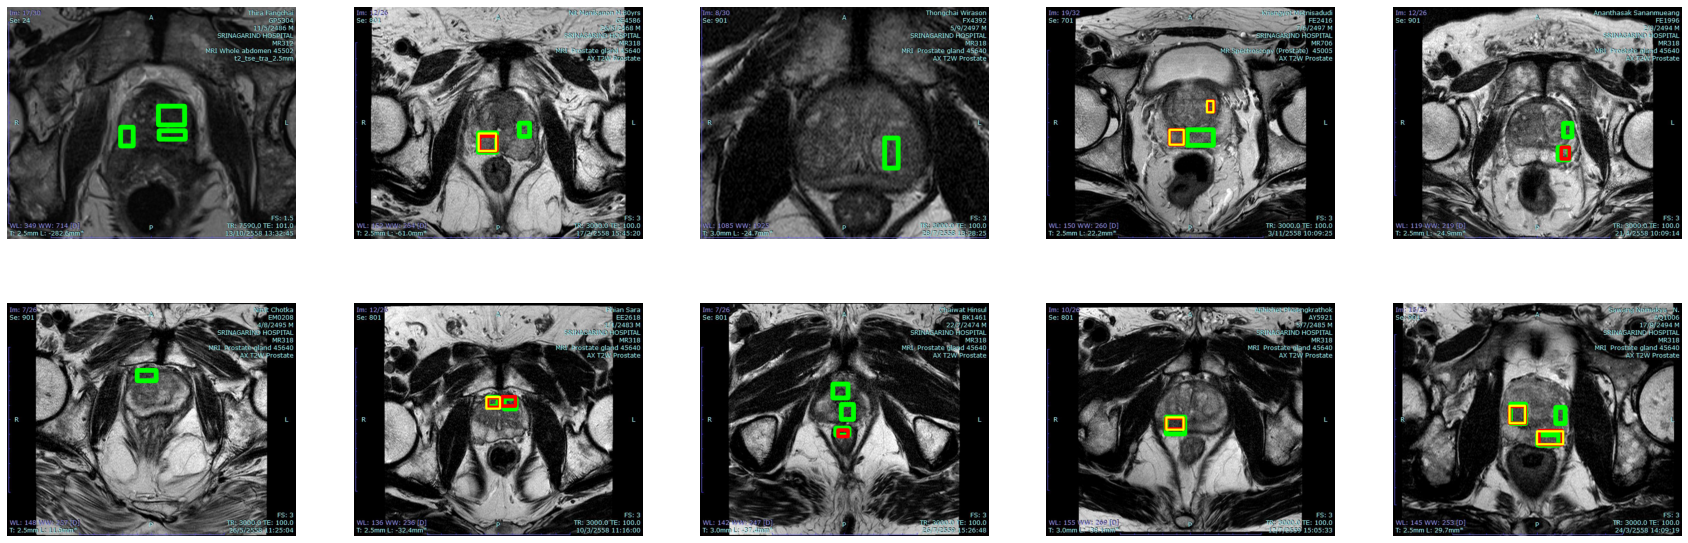

In [19]:
# Plot img Prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = merge_model
w = 40
h = 40
fig = plt.figure(figsize=(30, 10))
columns = 5
rows = 2

fileName = merge_model['fileName'].tolist()
for m in range(1, columns*rows +1):
    res = merge_model[merge_model['fileName'] ==fileName[m-1]]

    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['Path'].tolist()[0]
    img_c = cv2.imread(img_path)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_pre = int(res['gt_xmin'].tolist()[i][j])
        ymin_pre = int(res['gt_ymin'].tolist()[i][j])
        xmax_pre = int(res['gt_xmax'].tolist()[i][j])
        ymax_pre = int(res['gt_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 14)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 14)

    for j in range(len(res['pros_xmin'].tolist()[i])):
        xmin_pre = int(res['pros_xmin'].tolist()[i][j])
        ymin_pre = int(res['pros_ymin'].tolist()[i][j])
        xmax_pre = int(res['pros_xmax'].tolist()[i][j])
        ymax_pre = int(res['pros_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 10)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 10)
            
    for j in range(len(res['pros12_xmin'].tolist()[i])):
        xmin_pre = int(res['pros12_xmin'].tolist()[i][j])
        ymin_pre = int(res['pros12_ymin'].tolist()[i][j])
        xmax_pre = int(res['pros12_xmax'].tolist()[i][j])
        ymax_pre = int(res['pros12_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 255, 0), 6)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 255, 0), 6)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()

### Plt. Images

> ### 1. Green = ground truth

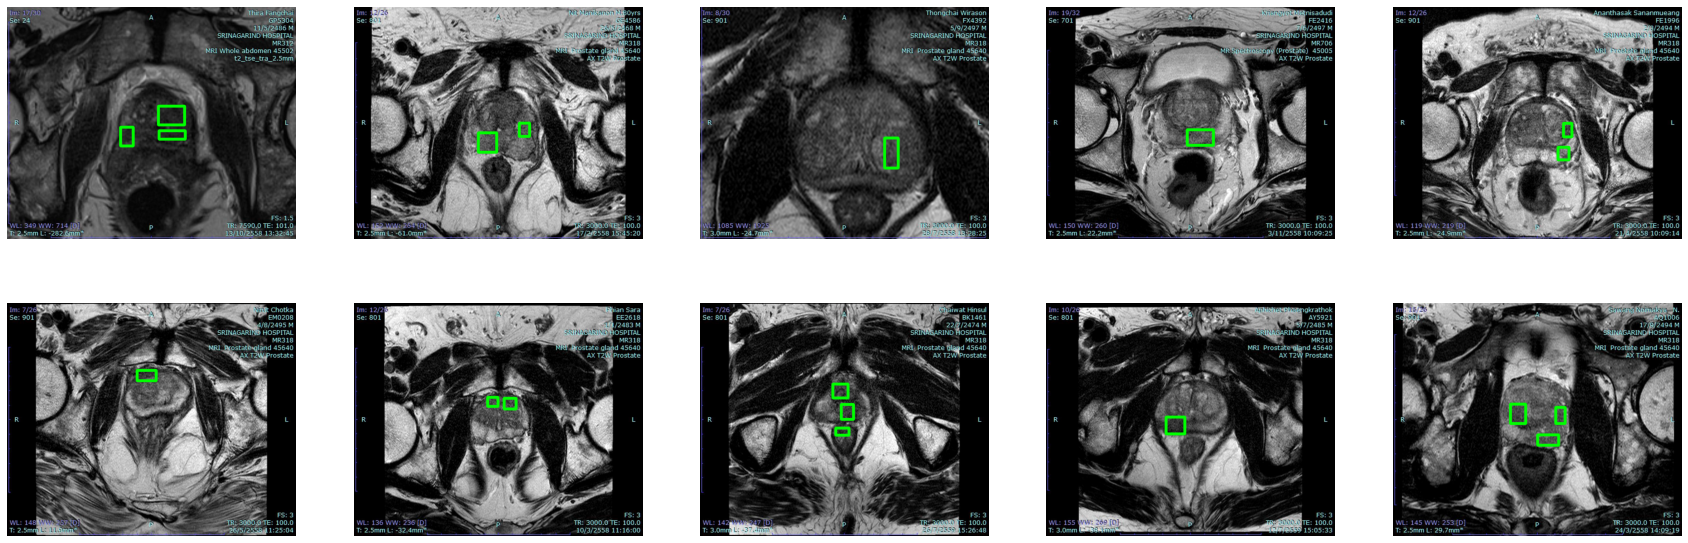

In [6]:
# Plot gt
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = merge_model
w = 40
h = 40
fig = plt.figure(figsize=(30, 10))
columns = 5
rows = 2

fileName = merge_model['fileName'].tolist()
for m in range(1, columns*rows +1):
    res = merge_model[merge_model['fileName'] ==fileName[m-1]]

    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['Path'].tolist()[0]
    img_c = cv2.imread(img_path)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_pre = int(res['gt_xmin'].tolist()[i][j])
        ymin_pre = int(res['gt_ymin'].tolist()[i][j])
        xmax_pre = int(res['gt_xmax'].tolist()[i][j])
        ymax_pre = int(res['gt_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 7)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 7)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()

### Plt. Images

> ### 2. Red = Model : prostate train set

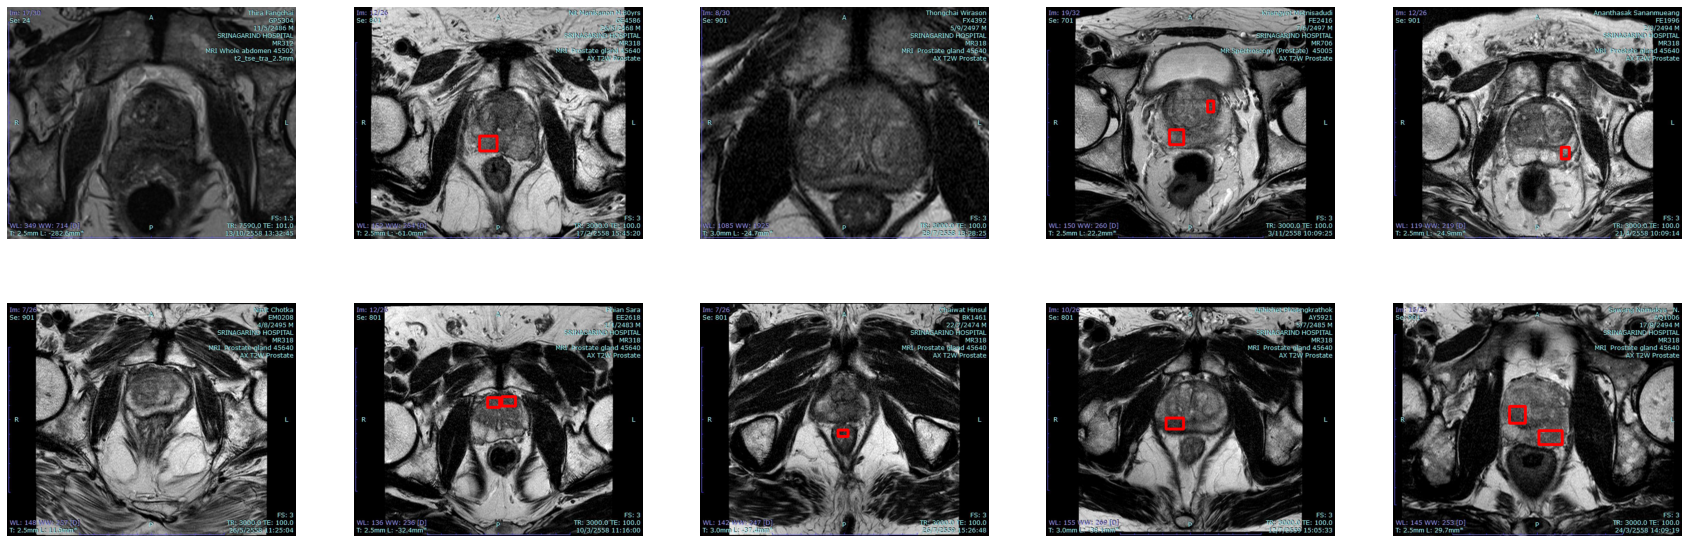

In [7]:
# Plot img Prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = merge_model
w = 40
h = 40
fig = plt.figure(figsize=(30, 10))
columns = 5
rows = 2

fileName = merge_model['fileName'].tolist()
for m in range(1, columns*rows +1):
    res = merge_model[merge_model['fileName'] ==fileName[m-1]]
    
    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['Path'].tolist()[0]
    img_c = cv2.imread(img_path)
    
    if len(res['pros_xmin'][m-1]) == 0:
        image_pre = img_c
    else:
        for j in range(len(res['pros_xmin'].tolist()[i])):
            xmin_pre = int(res['pros_xmin'].tolist()[i][j])
            ymin_pre = int(res['pros_ymin'].tolist()[i][j])
            xmax_pre = int(res['pros_xmax'].tolist()[i][j])
            ymax_pre = int(res['pros_ymax'].tolist()[i][j])
            if j == 0:
                image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 7)
            else:
                image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 7)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()

### Plt. Images

> ### 3. Red = Model : prostate+Prosmise12 train set

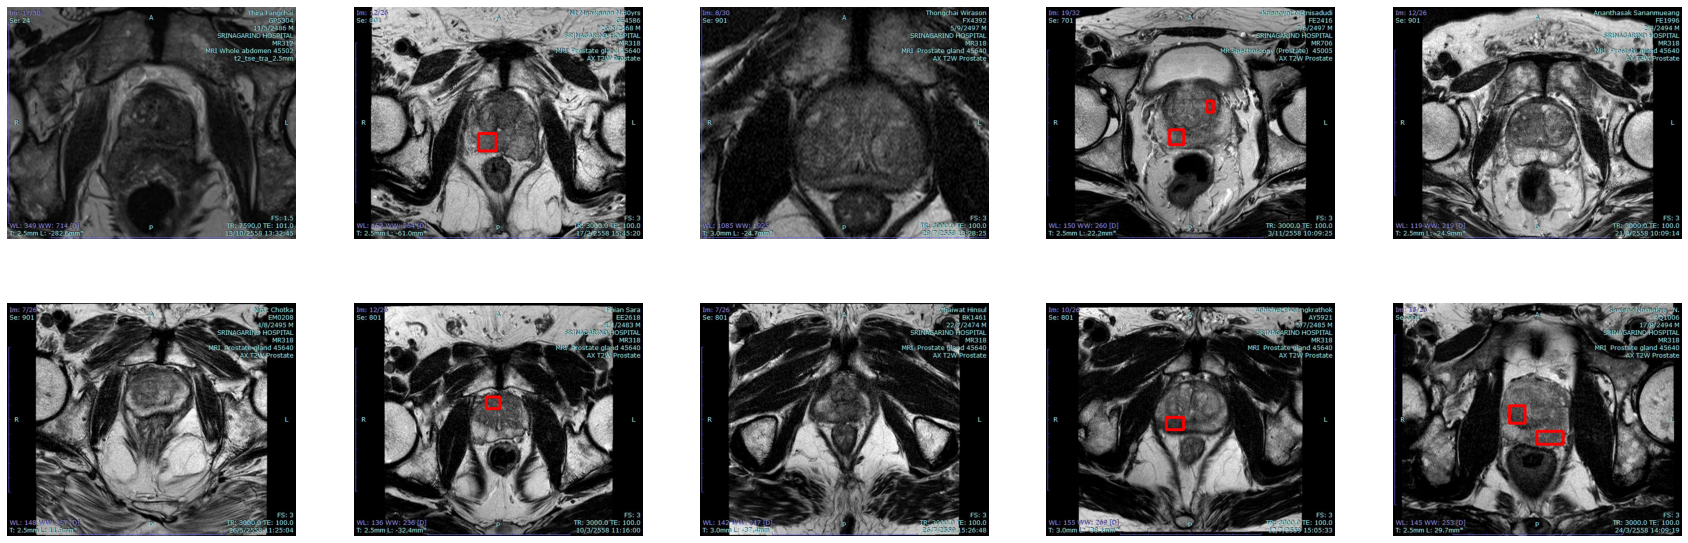

In [8]:
# Plot img Prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = merge_model
w = 40
h = 40
fig = plt.figure(figsize=(30, 10))
columns = 5
rows = 2

fileName = merge_model['fileName'].tolist()
for m in range(1, columns*rows +1):
    res = merge_model[merge_model['fileName'] ==fileName[m-1]]
    
    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['Path'].tolist()[0]
    img_c = cv2.imread(img_path)
    
    if len(res['pros12_xmin'][m-1]) == 0:
        image_pre = img_c
    else:
        for j in range(len(res['pros12_xmin'].tolist()[i])):
            xmin_pre = int(res['pros12_xmin'].tolist()[i][j])
            ymin_pre = int(res['pros12_ymin'].tolist()[i][j])
            xmax_pre = int(res['pros12_xmax'].tolist()[i][j])
            ymax_pre = int(res['pros12_ymax'].tolist()[i][j])
            if j == 0:
                image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 7)
            else:
                image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 7)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()